In [2]:
drop_val = 0.2

# ETL

In [68]:
# Importing required libraries
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, GRU, Bidirectional, RNN
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#Loading the dataset
data = pd.read_csv('Sarcasm Dataset.csv')

df = data.copy()
df.columns      

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'sarcasm', 'irony', 'satire',
       'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')

In [5]:
tokenizer = Tokenizer(oov_token="<OOV>")

In [6]:
import re
def cleaning(df):
    # coversion to lower Case
    df['tweet'] = df['tweet'].astype(str).apply(lambda x:' '.join(a.lower() for a in x.split()))

    # Replacing the special characters
    df['tweet'] = df['tweet'].str.replace('\W+', ' ')
#     df['tweet'] = df['tweet'].astype(str).apply(lambda s:''.join([i for i in s if i.isalnum()]))

    # Replacing the digits/numbers

    df['tweet'] = df['tweet'].astype(str).apply(lambda s:''.join([i for i in s if not i.isdigit()]))

    # Removing stop words

#     df['tweet'] = df['tweet'].astype(str).apply(lambda x: ' '.join(a for a in x.split() if a not in stop_words))

    # Lemmatization

    df['tweet'] = df['tweet'].astype(str).apply(lambda x:' '.join([Word(a).lemmatize() for a in x.split()]))

    return df

# stop_words = stopwords.words('english')

df = cleaning(df)
# df.head(20)

In [7]:
import string
sentences = [sublist.split() for sublist in df['tweet'].astype(str).values]
words = set([item for sublist in sentences for item in sublist])
vocab_size = len(words)
vocab_size

9447

In [8]:
df['tweet'] = df['tweet'].astype(str)

In [9]:
# split = round(len(df)*0.75)
# train_reviews = df['tweet'][:split]
# train_label = df['sarcastic'][:split]
# test_reviews = df['tweet'][split:]
# test_label = df['sarcastic'][split:]


In [10]:
# training_sentences = []
# training_labels = []
# testing_sentences = []
# testing_labels = []
# for row in train_reviews:
#     training_sentences.append(str(row))
# for row in train_label:
#     training_labels.append(row)
# for row in test_reviews:
#     testing_sentences.append(str(row))
# for row in test_label:
#     testing_labels.append(row)


In [11]:
import numpy as np
lengths = df["tweet"].str.len()
argmax = np.where(lengths == lengths.max())[0]
# max_len = len(data_v1.iloc[argmax]['tweet'])
max_length = lengths[argmax].astype(int)
print(max_length)
print(np.average(lengths))

2808    294
Name: tweet, dtype: int64
98.53979238754326


In [12]:
# data for binary 
X_train, X_test, y_train, y_test = train_test_split(df['tweet'].values,df['sarcastic'], test_size = 0.25, random_state = 42)
vocab_size = 9440
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [ ]:
# data for multiclass
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(df.loc[df['sarcastic']==1, 'tweet'].values, df.loc[df['sarcastic']==1, ['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']], test_size = 0.25, random_state = 42)
training_labels_final_mn = np.array(y_train_mn)
testing_labels_final_mn = np.array(y_test_mn)
# print(testing_labels_final_mn)
print('labels shape',testing_labels_final_mn.shape)
num_epochs = 20
vocab_size = 9440
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'
tokenizer_mn = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer_mn.fit_on_texts(X_train_mn)
word_index_mn = tokenizer_mn.word_index
sequences_mn = tokenizer_mn.texts_to_sequences(X_train_mn)
padded_mn = pad_sequences(sequences_mn, maxlen=max_length, truncating=trunc_type)
testing_sentences_mn = tokenizer_mn.texts_to_sequences(X_test_mn)
testing_padded_mn = pad_sequences(testing_sentences_mn, maxlen=max_length)

# LSTM 2 -layered

In [ ]:
# import tensorflow as tf
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
# model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, dropout=drop_val, recurrent_dropout=drop_val, activation='relu', input_shape=(360,1), return_sequences=True))
model.add(LSTM(128, dropout=drop_val, recurrent_dropout=drop_val, activation='relu', ))
model.add(Dense(16,activation='tanh'))
model.add(Dense(1,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           151040    
                                                                 
 lstm (LSTM)                 (None, 120, 128)          74240     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 16)                2064      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 358,945
Trainable params: 358,945
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
82/82 [==============================] - 59s 649ms/step - loss: 0.5686 - accuracy: 0.2384 - val_loss: 0.5975 - val_accuracy: 0.2849
Epoch 2/20
82/82 [==============================] - 53s 647ms/step - loss: 0.5375 - accuracy: 0.2384 - val_loss: 0.5942 - val_accuracy: 0.2849
Epoch 3/20
82/82 [==============================] - 54s 656ms/step - loss: 0.4625 - accuracy: 0.2384 - val_loss: 0.6478 - val_accuracy: 0.2849
Epoch 4/20
82/82 [==============================] - 53s 645ms/step - loss: 0.3056 - accuracy: 0.2384 - val_loss: 0.8452 - val_accuracy: 0.2849
Epoch 5/20
82/82 [==============================] - 53s 645ms/step - loss: 0.1608 - accuracy: 0.2384 - val_loss: 0.9087 - val_accuracy: 0.2849
Epoch 6/20
82/82 [==============================] - 53s 645ms/step - loss: 0.0978 - accuracy: 0.2384 - val_loss: 1.1191 - val_accuracy: 0.2849
Epoch 7/20
82/82 [==============================] - 53s 646ms/step - loss: 0.0699 - accuracy: 0.2384 - val_loss: 1.2398 - val_accuracy: 0.2849

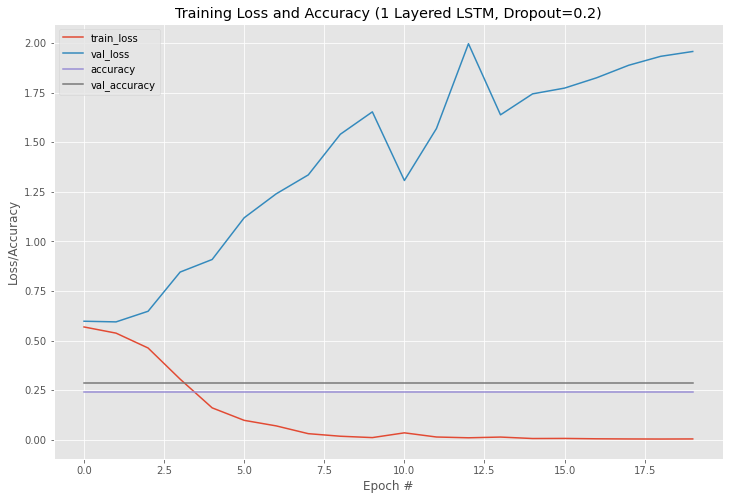

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history['accuracy'], label="accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (1 Layered LSTM, Dropout=0.2)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
# actual values
actual = testing_labels_final
# predicted values
predicted = model.predict(testing_padded)

# confusion matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[247   0]
 [620   0]]
Outcome values : 
 247 0 620 0
Classification report : 
               precision    recall  f1-score   support

           1       0.28      1.00      0.44       247
           0       0.00      0.00      0.00       620

    accuracy                           0.28       867
   macro avg       0.14      0.50      0.22       867
weighted avg       0.08      0.28      0.13       867



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM multi class 2 layered

In [ ]:
import tensorflow as tf
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(6, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
# model.add(SpatialDropout1D(0.4))
model2.add(LSTM(128, dropout=drop_val, recurrent_dropout=drop_val, activation='LeakyReLU', input_shape=(360,1), return_sequences=True))
model2.add(LSTM(128, dropout=drop_val, recurrent_dropout=drop_val, activation='LeakyReLU', ))
model2.add(Dense(36,activation='tanh'))
model2.add(Dense(6,activation='sigmoid'))
model2.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='sgd', metrics = ['accuracy'])
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 120, 16)           151040    
                                                                 
 lstm_30 (LSTM)              (None, 120, 128)          74240     
                                                                 
 lstm_31 (LSTM)              (None, 128)               131584    
                                                                 
 dense_30 (Dense)            (None, 36)                4644      
                                                                 
 dense_31 (Dense)            (None, 6)                 222       
                                                                 
Total params: 361,730
Trainable params: 361,730
Non-trainable params: 0
_________________________________________________________________


In [61]:
num_epochs = 20
history2 = model2.fit(padded_mn, training_labels_final_mn, epochs=num_epochs, validation_data=(testing_padded_mn, testing_labels_final_mn))

Epoch 1/20
21/21 [==============================] - 17s 556ms/step - loss: 1.7449 - accuracy: 0.8000 - val_loss: 1.3627 - val_accuracy: 0.8525
Epoch 2/20
21/21 [==============================] - 11s 525ms/step - loss: 1.4273 - accuracy: 0.8123 - val_loss: 1.2713 - val_accuracy: 0.8525
Epoch 3/20
21/21 [==============================] - 11s 520ms/step - loss: 1.3316 - accuracy: 0.8123 - val_loss: 1.2347 - val_accuracy: 0.8525
Epoch 4/20
21/21 [==============================] - 11s 524ms/step - loss: 1.3057 - accuracy: 0.8123 - val_loss: 1.2296 - val_accuracy: 0.8525
Epoch 5/20
21/21 [==============================] - 11s 521ms/step - loss: 1.3145 - accuracy: 0.8123 - val_loss: 1.2325 - val_accuracy: 0.8525
Epoch 6/20
21/21 [==============================] - 11s 520ms/step - loss: 1.3156 - accuracy: 0.8123 - val_loss: 1.2381 - val_accuracy: 0.8525
Epoch 7/20
21/21 [==============================] - 11s 523ms/step - loss: 1.3180 - accuracy: 0.8123 - val_loss: 1.2394 - val_accuracy: 0.8525

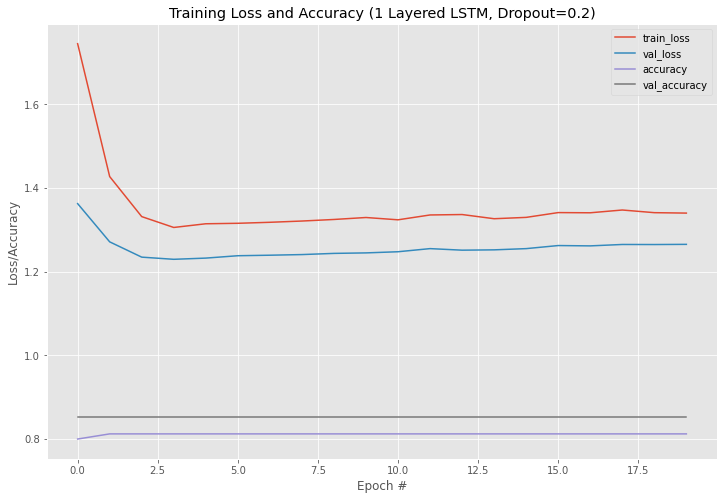

In [63]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history2.history["loss"], label="train_loss")
plt.plot(N, history2.history["val_loss"], label="val_loss")
plt.plot(N, history2.history['accuracy'], label="accuracy")
plt.plot(N, history2.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (1 Layered LSTM, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# Vanilla RNN

In [30]:
# model3 = Sequential()
# model3.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
# # model.add(SpatialDropout1D(0.4))
# model3.add(Dense(256,activation='relu'))
# model3.add(Dense(128,activation='tanh'))
# model3.add(Dense(1,activation='sigmoid'))
# model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
# model3.summary()
import tensorflow as tf
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           151040    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_15 (Dense)            (None, 128)               2176      
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 169,857
Trainable params: 169,857
Non-trainable params: 0
________________________________________________

In [31]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)
num_epochs = 20
history3 = model3.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
82/82 [==============================] - 1s 6ms/step - loss: 0.5873 - accuracy: 0.7547 - val_loss: 0.6018 - val_accuracy: 0.7151
Epoch 2/20
82/82 [==============================] - 0s 4ms/step - loss: 0.5487 - accuracy: 0.7616 - val_loss: 0.6023 - val_accuracy: 0.7151
Epoch 3/20
82/82 [==============================] - 0s 4ms/step - loss: 0.5464 - accuracy: 0.7616 - val_loss: 0.6034 - val_accuracy: 0.7151
Epoch 4/20
82/82 [==============================] - 0s 4ms/step - loss: 0.5403 - accuracy: 0.7616 - val_loss: 0.6293 - val_accuracy: 0.7151
Epoch 5/20
82/82 [==============================] - 0s 4ms/step - loss: 0.5294 - accuracy: 0.7616 - val_loss: 0.6032 - val_accuracy: 0.7151
Epoch 6/20
82/82 [==============================] - 0s 4ms/step - loss: 0.4727 - accuracy: 0.7636 - val_loss: 0.5855 - val_accuracy: 0.7209
Epoch 7/20
82/82 [==============================] - 0s 4ms/step - loss: 0.3504 - accuracy: 0.8381 - val_loss: 0.6984 - val_accuracy: 0.7140
Epoch 8/20
82/82 [==

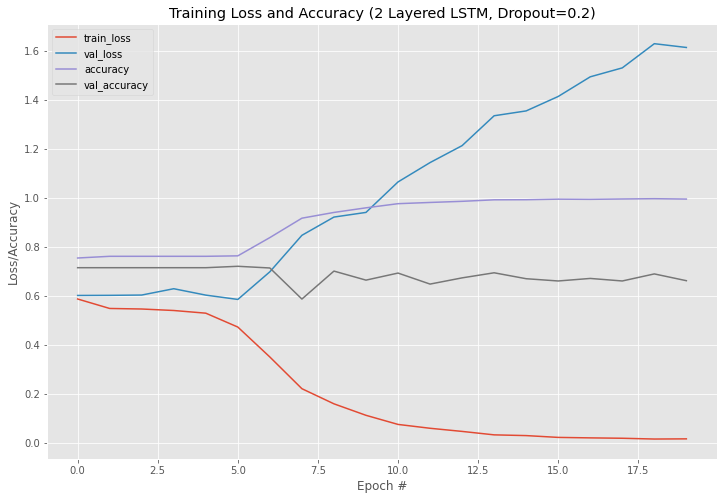

In [34]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history3.history["loss"], label="train_loss")
plt.plot(N, history3.history["val_loss"], label="val_loss")
plt.plot(N, history3.history['accuracy'], label="accuracy")
plt.plot(N, history3.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (2 Layered LSTM, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [48]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
# actual values
actual = testing_labels_final
# predicted values
predicted = model3.predict(testing_padded)

# confusion matrix
matrix = confusion_matrix(actual,np.array([int((val-0.5)>0) for val in predicted]), labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,np.array([int((val-0.5)>0) for val in predicted]),labels=[1,0]).reshape(-1)
print('Outcome values (tp, fn, fp, tn): \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,np.array([int((val-0.5)>0) for val in predicted]),labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 82 165]
 [128 492]]
Outcome values (tp, fn, fp, tn): 
 82 165 128 492
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.33      0.36       247
           0       0.75      0.79      0.77       620

    accuracy                           0.66       867
   macro avg       0.57      0.56      0.56       867
weighted avg       0.65      0.66      0.65       867



# Vanilla RNN multiclass

In [15]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])
model4.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           151040    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
Total params: 170,502
Trainable params: 170,502
Non-trainable params: 0
__________________________________________________

In [22]:
X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(df.loc[df['sarcastic']==1, 'tweet'].values, df.loc[df['sarcastic']==1, ['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']], test_size = 0.25, random_state = 42)
training_labels_final_mn = np.array(y_train_mn)
testing_labels_final_mn = np.array(y_test_mn)
# print(testing_labels_final_mn)
print('labels shape',testing_labels_final_mn.shape)
num_epochs = 20
vocab_size = 9440
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'
tokenizer_mn = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer_mn.fit_on_texts(X_train_mn)
word_index_mn = tokenizer_mn.word_index
sequences_mn = tokenizer_mn.texts_to_sequences(X_train_mn)
padded_mn = pad_sequences(sequences_mn, maxlen=max_length, truncating=trunc_type)
testing_sentences_mn = tokenizer_mn.texts_to_sequences(X_test_mn)
testing_padded_mn = pad_sequences(testing_sentences_mn, maxlen=max_length)

In [24]:
history4 = model4.fit(padded_mn, training_labels_final_mn, epochs=num_epochs, validation_data=(testing_padded_mn, testing_labels_final_mn))

Epoch 1/20
21/21 [==============================] - 1s 26ms/step - loss: 2.0603 - accuracy: 0.7738 - val_loss: 1.8405 - val_accuracy: 0.8525
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 1.5996 - accuracy: 0.8123 - val_loss: 1.2208 - val_accuracy: 0.8525
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 1.3541 - accuracy: 0.8123 - val_loss: 1.2543 - val_accuracy: 0.8525
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 1.3363 - accuracy: 0.8123 - val_loss: 1.2499 - val_accuracy: 0.8525
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 1.3949 - accuracy: 0.8123 - val_loss: 1.3831 - val_accuracy: 0.8525
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 1.5445 - accuracy: 0.8123 - val_loss: 1.6017 - val_accuracy: 0.8525
Epoch 7/20
21/21 [==============================] - 0s 6ms/step - loss: 1.8419 - accuracy: 0.8123 - val_loss: 2.1550 - val_accuracy: 0.8525
Epoch 8/20
21/21 [=

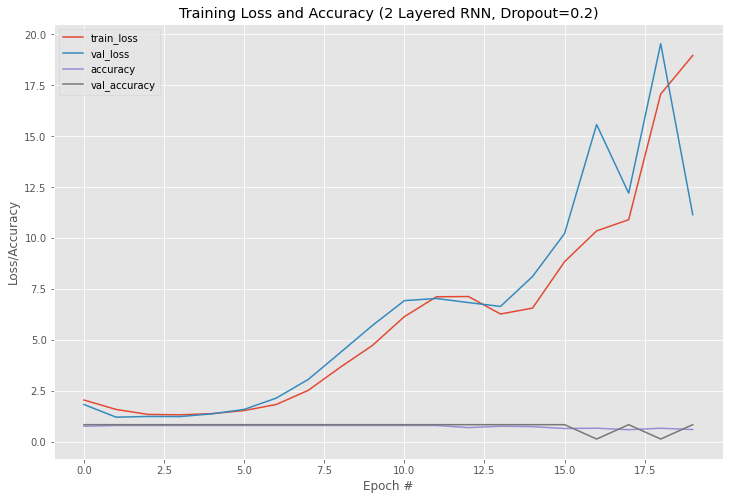

In [25]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history4.history["loss"], label="train_loss")
plt.plot(N, history4.history["val_loss"], label="val_loss")
plt.plot(N, history4.history['accuracy'], label="accuracy")
plt.plot(N, history4.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (2 Layered RNN, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# GRU 2 layered binary

In [33]:
model5 = Sequential()
model5.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
# model.add(SpatialDropout1D(0.4))
model5.add(GRU(128, dropout=drop_val, recurrent_dropout=drop_val, activation='LeakyReLU', input_shape=(360,1), return_sequences=True))
model5.add(GRU(128, dropout=drop_val, recurrent_dropout=drop_val, activation='LeakyReLU', ))
model5.add(Dense(36,activation='tanh'))
model5.add(Dense(1,activation='sigmoid'))
model5.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model5.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           151040    
                                                                 
 gru_2 (GRU)                 (None, 120, 128)          56064     
                                                                 
 gru_3 (GRU)                 (None, 128)               99072     
                                                                 
 dense_5 (Dense)             (None, 36)                4644      
                                                                 
 dense_6 (Dense)             (None, 1)                 37        
                                                                 
Total params: 310,857
Trainable params: 310,857
Non-trainable params: 0
_________________________________________________________________


In [34]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)
num_epochs = 20
history5 = model5.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
82/82 [==============================] - 49s 531ms/step - loss: 0.5687 - accuracy: 0.7593 - val_loss: 0.6112 - val_accuracy: 0.7151
Epoch 2/20
82/82 [==============================] - 43s 522ms/step - loss: 0.5233 - accuracy: 0.7609 - val_loss: 0.6233 - val_accuracy: 0.7047
Epoch 3/20
82/82 [==============================] - 44s 532ms/step - loss: 0.3555 - accuracy: 0.8516 - val_loss: 0.7513 - val_accuracy: 0.6563
Epoch 4/20
82/82 [==============================] - 43s 528ms/step - loss: 0.1749 - accuracy: 0.9346 - val_loss: 1.0638 - val_accuracy: 0.6840
Epoch 5/20
82/82 [==============================] - 43s 519ms/step - loss: 0.0767 - accuracy: 0.9746 - val_loss: 1.4207 - val_accuracy: 0.6574
Epoch 6/20
82/82 [==============================] - 43s 519ms/step - loss: 0.0530 - accuracy: 0.9831 - val_loss: 1.2757 - val_accuracy: 0.6621
Epoch 7/20
82/82 [==============================] - 42s 518ms/step - loss: 0.0418 - accuracy: 0.9873 - val_loss: 1.5328 - val_accuracy: 0.6678

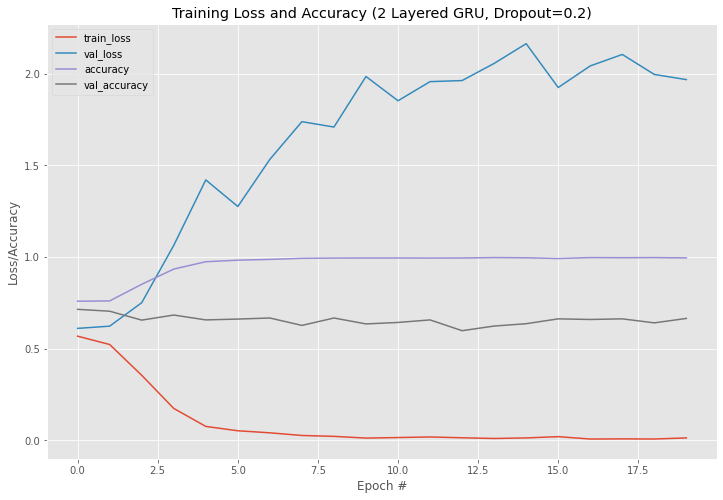

In [35]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history5.history["loss"], label="train_loss")
plt.plot(N, history5.history["val_loss"], label="val_loss")
plt.plot(N, history5.history['accuracy'], label="accuracy")
plt.plot(N, history5.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (2 Layered GRU, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [36]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
# actual values
actual = testing_labels_final
# predicted values
predicted = model5.predict(testing_padded)

# confusion matrix
matrix = confusion_matrix(actual,np.array([int((val-0.5)>0) for val in predicted]), labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,np.array([int((val-0.5)>0) for val in predicted]),labels=[1,0]).reshape(-1)
print('Outcome values (tp, fn, fp, tn): \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,np.array([int((val-0.5)>0) for val in predicted]),labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[ 61 186]
 [104 516]]
Outcome values (tp, fn, fp, tn): 
 61 186 104 516
Classification report : 
               precision    recall  f1-score   support

           1       0.37      0.25      0.30       247
           0       0.74      0.83      0.78       620

    accuracy                           0.67       867
   macro avg       0.55      0.54      0.54       867
weighted avg       0.63      0.67      0.64       867



# GRU 2 Layered Multiclass

In [40]:
model6 = Sequential()
model6.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
# model.add(SpatialDropout1D(0.4))
model6.add(GRU(128, dropout=drop_val, recurrent_dropout=drop_val, activation='LeakyReLU', input_shape=(360,1), return_sequences=True))
model6.add(GRU(128, dropout=drop_val, recurrent_dropout=drop_val, activation='LeakyReLU', ))
model6.add(Dense(36,activation='tanh'))
model6.add(Dense(6,activation='sigmoid'))
model6.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics = ['accuracy'])
model6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 16)           151040    
                                                                 
 gru_6 (GRU)                 (None, 120, 128)          56064     
                                                                 
 gru_7 (GRU)                 (None, 128)               99072     
                                                                 
 dense_9 (Dense)             (None, 36)                4644      
                                                                 
 dense_10 (Dense)            (None, 6)                 222       
                                                                 
Total params: 311,042
Trainable params: 311,042
Non-trainable params: 0
_________________________________________________________________


In [41]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)
num_epochs = 20
history6 = model6.fit(padded_mn, training_labels_final_mn, epochs=num_epochs, validation_data=(testing_padded_mn, testing_labels_final_mn))

Epoch 1/20
21/21 [==============================] - 17s 556ms/step - loss: 1.7774 - accuracy: 0.7831 - val_loss: 1.3277 - val_accuracy: 0.8525
Epoch 2/20
21/21 [==============================] - 11s 520ms/step - loss: 1.3968 - accuracy: 0.8123 - val_loss: 1.3676 - val_accuracy: 0.8525
Epoch 3/20
21/21 [==============================] - 11s 516ms/step - loss: 1.4240 - accuracy: 0.8123 - val_loss: 1.3004 - val_accuracy: 0.8525
Epoch 4/20
21/21 [==============================] - 11s 517ms/step - loss: 1.3735 - accuracy: 0.8123 - val_loss: 1.2577 - val_accuracy: 0.8525
Epoch 5/20
21/21 [==============================] - 11s 516ms/step - loss: 1.3413 - accuracy: 0.8123 - val_loss: 1.2400 - val_accuracy: 0.8525
Epoch 6/20
21/21 [==============================] - 11s 521ms/step - loss: 1.3302 - accuracy: 0.8123 - val_loss: 1.2332 - val_accuracy: 0.8525
Epoch 7/20
21/21 [==============================] - 11s 516ms/step - loss: 1.3318 - accuracy: 0.8123 - val_loss: 1.2296 - val_accuracy: 0.8525

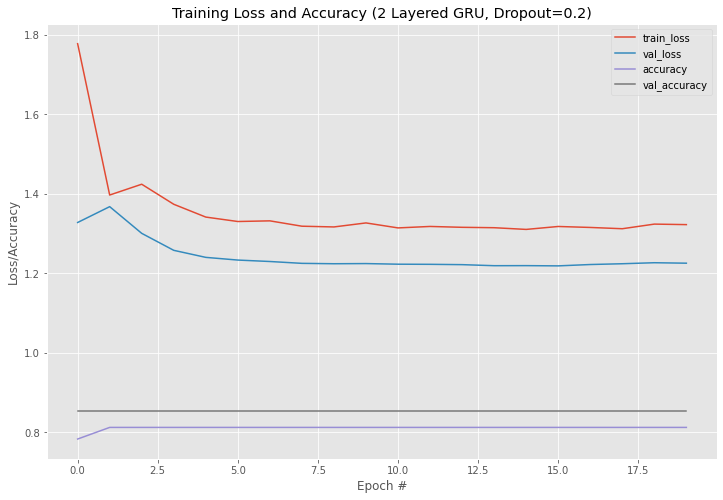

In [42]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history6.history["loss"], label="train_loss")
plt.plot(N, history6.history["val_loss"], label="val_loss")
plt.plot(N, history6.history['accuracy'], label="accuracy")
plt.plot(N, history6.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (2 Layered GRU, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

#BiLSTM

In [60]:
model7 = Sequential()
model7.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model7.add(Bidirectional(LSTM(20, return_sequences=True, dropout=drop_val, activation='LeakyReLU')))
model7.add(Bidirectional(LSTM(20, dropout=drop_val, activation='LeakyReLU')))
model7.add(Dense(36,activation='tanh'))
model7.add(Dense(1,activation='sigmoid'))
model7.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model7.summary()



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 16)           151040    
                                                                 
 bidirectional_5 (Bidirectio  (None, 120, 40)          5920      
 nal)                                                            
                                                                 
 bidirectional_6 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_17 (Dense)            (None, 36)                1476      
                                                                 
 dense_18 (Dense)            (None, 1)                 37        
                                                                 
Total params: 168,233
Trainable params: 168,233
Non-t

In [52]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)
num_epochs = 20
history7 = model7.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
82/82 [==============================] - 21s 183ms/step - loss: 0.5756 - accuracy: 0.7562 - val_loss: 0.5964 - val_accuracy: 0.7151
Epoch 2/20
82/82 [==============================] - 14s 173ms/step - loss: 0.5389 - accuracy: 0.7616 - val_loss: 0.6083 - val_accuracy: 0.7151
Epoch 3/20
82/82 [==============================] - 14s 173ms/step - loss: 0.8052 - accuracy: 0.7055 - val_loss: 0.6656 - val_accuracy: 0.7151
Epoch 4/20
82/82 [==============================] - 14s 175ms/step - loss: 0.7149 - accuracy: 0.6559 - val_loss: 0.5978 - val_accuracy: 0.7151
Epoch 5/20
82/82 [==============================] - 14s 175ms/step - loss: 0.5632 - accuracy: 0.7539 - val_loss: 0.6009 - val_accuracy: 0.7151
Epoch 6/20
82/82 [==============================] - 15s 181ms/step - loss: 0.5528 - accuracy: 0.7616 - val_loss: 0.6017 - val_accuracy: 0.7151
Epoch 7/20
82/82 [==============================] - 14s 173ms/step - loss: 0.5493 - accuracy: 0.7616 - val_loss: 0.5996 - val_accuracy: 0.7151

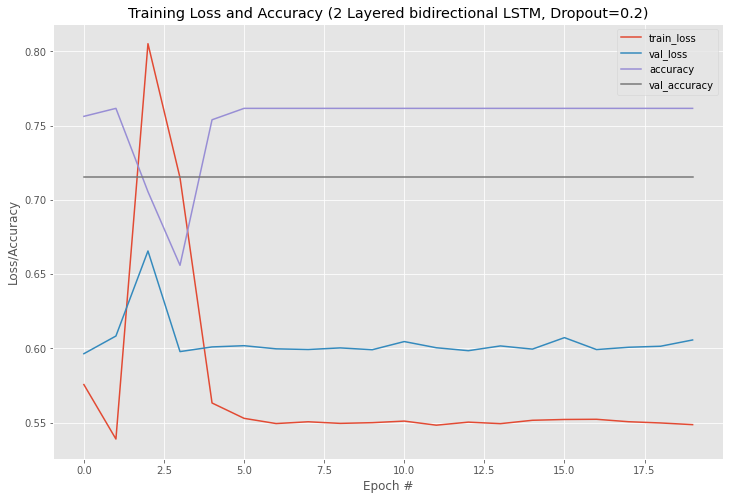

In [53]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history7.history["loss"], label="train_loss")
plt.plot(N, history7.history["val_loss"], label="val_loss")
plt.plot(N, history7.history['accuracy'], label="accuracy")
plt.plot(N, history7.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (2 Layered bidirectional LSTM, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [56]:
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
# actual values
actual = testing_labels_final
# predicted values
predicted = model5.predict(testing_padded)

# confusion matrix
matrix = confusion_matrix(actual,np.array([int((val)>0) for val in predicted]), labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,np.array([int((val)>0) for val in predicted]),labels=[1,0]).reshape(-1)
print('Outcome values (tp, fn, fp, tn): \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,np.array([int((val)>0) for val in predicted]),labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[247   0]
 [620   0]]
Outcome values (tp, fn, fp, tn): 
 247 0 620 0
Classification report : 
               precision    recall  f1-score   support

           1       0.28      1.00      0.44       247
           0       0.00      0.00      0.00       620

    accuracy                           0.28       867
   macro avg       0.14      0.50      0.22       867
weighted avg       0.08      0.28      0.13       867



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#BiDirectional LSTM multi-class

In [71]:
model8 = Sequential()
model8.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model8.add(Bidirectional(LSTM(128, return_sequences=True, dropout=drop_val, activation='tanh')))
model8.add(Bidirectional(LSTM(128, dropout=drop_val, activation='tanh')))
model8.add(Dense(36,activation='tanh'))
model8.add(Dense(6,activation='sigmoid'))
model8.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics = ['accuracy'])
model8.summary()



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 120, 16)           151040    
                                                                 
 bidirectional_7 (Bidirectio  (None, 120, 256)         148480    
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_21 (Dense)            (None, 36)                9252      
                                                                 
 dense_22 (Dense)            (None, 6)                 222       
                                                                 
Total params: 703,234
Trainable params: 703,234
Non-t

In [72]:
training_labels_final = np.array(y_train)
testing_labels_final = np.array(y_test)
num_epochs = 20
history8 = model8.fit(padded_mn, training_labels_final_mn, epochs=num_epochs, validation_data=(testing_padded_mn, testing_labels_final_mn))

Epoch 1/20
21/21 [==============================] - 25s 842ms/step - loss: 1.5391 - accuracy: 0.7985 - val_loss: 1.2913 - val_accuracy: 0.8525
Epoch 2/20
21/21 [==============================] - 15s 714ms/step - loss: 1.3234 - accuracy: 0.8123 - val_loss: 1.2542 - val_accuracy: 0.8525
Epoch 3/20
21/21 [==============================] - 15s 712ms/step - loss: 1.3169 - accuracy: 0.8123 - val_loss: 1.2287 - val_accuracy: 0.8525
Epoch 4/20
21/21 [==============================] - 15s 715ms/step - loss: 1.3034 - accuracy: 0.8123 - val_loss: 1.2280 - val_accuracy: 0.8525
Epoch 5/20
21/21 [==============================] - 15s 707ms/step - loss: 1.3026 - accuracy: 0.8123 - val_loss: 1.2203 - val_accuracy: 0.8525
Epoch 6/20
21/21 [==============================] - 15s 711ms/step - loss: 1.3029 - accuracy: 0.8123 - val_loss: 1.2217 - val_accuracy: 0.8525
Epoch 7/20
21/21 [==============================] - 15s 708ms/step - loss: 1.3044 - accuracy: 0.8123 - val_loss: 1.2244 - val_accuracy: 0.8525

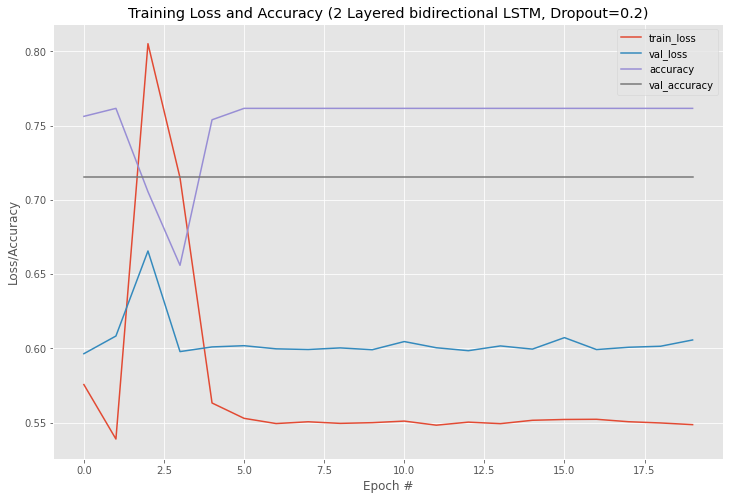

In [73]:
import matplotlib.pyplot as plt
import numpy as np
# plot the training loss and accuracy
plt.rcParams["figure.figsize"] = (12,8)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history7.history["loss"], label="train_loss")
plt.plot(N, history7.history["val_loss"], label="val_loss")
plt.plot(N, history7.history['accuracy'], label="accuracy")
plt.plot(N, history7.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (2 Layered bidirectional LSTM, Dropout="+str(drop_val)+')')
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()